In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
from bs4 import BeautifulSoup


# Study data files
abridged_crashes_path = "baaa-aircraft-dataset(baaa-aircraft-dataset).csv"



abridged_crashes_metadata = pd.read_csv(abridged_crashes_path)

crash_data_abridged=pd.merge(abridged_crashes_metadata,abridged_crashes_metadata,how="left")
# Display the data table for preview
crash_data_abridged.head()


,Date,Operator,A/C Type,Location,Crew on board,Crew fatalities,PAX on board,PAX fatalities,Total on board,Total fatalities,Flight Type,Flight Phase,Continent,Year,Probable Causes
0,27-Apr-20,Compagnie Generale TRANSAERIENNE,Nieuport-Delage NiD-30,"The Channel, All World",1,1,0,0.0,1,1,Postal,Flight,Europe,1920,Unknown Reasons
1,15-Sep-23,Armée De L'Air,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",0,0,0,0.0,0,0,Scheduled Revenue Flight,Flight,Europe,1923,Technical Factors
2,24-Apr-24,KLM,Fokker F3,"North Sea, All World",1,1,2,2.0,3,3,Scheduled Revenue Flight,Flight,Europe,1924,Technical Factors
3,21-Aug-24,Regia Aeronautica,Dornier DO J wal,"Atlantic Ocean, All World",5,0,0,0.0,5,0,Private,Flight,North America,1924,Technical Factors
4,9-Feb-25,Compagnie Générale d'Enterprises Aéronatiques,Lioré-et-Olivier LeO H-13,"Mediterranean Sea, All World",2,0,0,0.0,2,0,Postal,Flight,Africa,1925,Technical Factors


In [2]:
# Study data files
full_crashes_path = "Plane_Crashes_age.csv"



full_crashes_metadata = pd.read_csv(full_crashes_path)

crash_data_full=pd.merge(full_crashes_metadata,full_crashes_metadata,how="left")
# Display the data table for preview
crash_data_full.head()


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Age of Plane,crash year
0,6/8/1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,6.0,5.0,0.0,0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,0,1918
1,8/26/1918,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,2.0,0.0,0.0,0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown,0,1918
2,12/31/1918,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9983,Landing (descent or approach),Military,No,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,2.0,2.0,0.0,0,0.0,2,"While landing, aircraft bounced and crashed in...",Unknown,0,1918
3,4/7/1919,NaN,Unnamed aircraft,Private French,NaN,Landing (descent or approach),Scheduled Revenue Flight,Yes,"Plain, Valley",NaN,...,NaN,0.0,NaN,0,0.0,0,Crashed in unknow circumstances somewhere in F...,Technical failure,0,1919
4,5/1/1919,5H 30M 0S,De Havilland DH.9,Aircraft Transport %26 Travel - AT%26T,G-EAAA,Flight,Postal (mail),No,"Plain, Valley",Hendon - Bournemouth,...,1.0,1.0,0.0,0,0.0,1,The aircraft departed Hendon on a night mail f...,Unknown,0,1919


In [8]:
Plane_Crashes_crewstats = "Plane_Crashes_crewstats.csv"



crew_crashes_metadata = pd.read_csv(Plane_Crashes_crewstats)

crew_crashes_metadata=pd.merge(crew_crashes_metadata,crew_crashes_metadata,how="left")
# Display the data table for preview
crew_crashes_metadata.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Crew Fatality Rate,Passenger Fatality Rate,Circumstances,Crash cause,Age of Plane,crash year
0,5/2/1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,0,0,0.0,2,1.000000,0.0,The single engine airplane departed Dayton-McC...,Technical failure,NaN,1918
1,6/8/1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,0,0,0.0,5,0.833333,0.0,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,0.0,1918
2,6/11/1918,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,0,0,0.0,1,0.500000,0.0,The single engine aircraft was completing a lo...,Unknown,NaN,1918
3,6/19/1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,0,0,0.0,1,1.000000,0.0,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,NaN,1918
4,7/14/1918,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,0,0,0.0,1,1.000000,0.0,The pilot departed Isle of Grain on a delivery...,Unknown,NaN,1918


In [74]:
average_fatalities_per_year = crew_crashes_metadata.groupby('crash year')['Crew fatalities'].mean().reset_index()

# Rename the columns for clarity
average_fatalities_per_year.columns = ['crash year', 'Average Crew fatalities']

print(average_fatalities_per_year)

     crash year  Average Crew fatalities
0          1918                 1.263158
1          1919                 0.400000
2          1920                 0.456693
3          1921                 0.413043
4          1922                 0.641509
..          ...                      ...
100        2018                 1.206107
101        2019                 1.110345
102        2020                 0.946903
103        2021                 1.230088
104        2022                 0.897436

[105 rows x 2 columns]


The correlation between between the crash date and the number of crew member deaths is -0.08


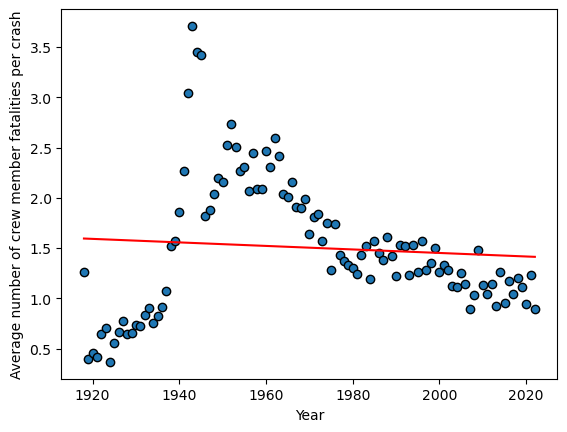

In [142]:
#PASSENGER AND CREW FATALITY RATE OVER TIME
# Calculate the correlation coefficient and linear regression model 

crewcorrelation =st.pearsonr(average_fatalities_per_year["crash year"],average_fatalities_per_year["Average Crew fatalities"])
print(f"The correlation between between the crash date and the number of crew member deaths is {round(crewcorrelation[0],2)}")

# Add the linear regression equation and line to plot

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(average_fatalities_per_year["crash year"],average_fatalities_per_year["Average Crew fatalities"])
regress_values=crew_crashes_metadata["crash year"]* slope + intercept


plt.scatter(average_fatalities_per_year["crash year"],average_fatalities_per_year["Average Crew fatalities"],edgecolors="k")
plt.plot(average_fatalities_per_year['crash year'], slope * average_fatalities_per_year['crash year'] + intercept, color='red', label='Regression line')
plt.xlabel("Year")
plt.xlabel("Year")
plt.ylabel("Average number of crew member fatalities per crash")
plt.show()

In [144]:
average_pax_fatalities_per_year = crew_crashes_metadata.groupby('crash year')['PAX fatalities'].mean().reset_index()

# Rename the columns for clarity
average_pax_fatalities_per_year.columns = ['crash year', 'Average PAX fatalities']

print(average_pax_fatalities_per_year)

     crash year  Average PAX fatalities
0          1918                0.263158
1          1919                0.225000
2          1920                0.149606
3          1921                0.115942
4          1922                0.349057
..          ...                     ...
100        2018                6.709924
101        2019                2.731034
102        2020                3.292035
103        2021                2.380531
104        2022                4.820513

[105 rows x 2 columns]


The correlation between between the crash year and number of passenger fatalities is 0.65


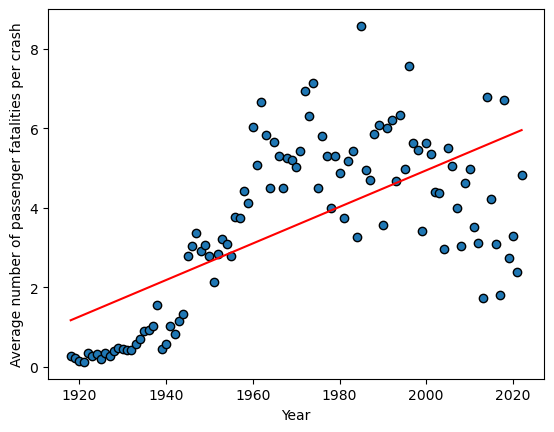

In [146]:
#PASSENGER AND CREW FATALITY RATE OVER TIME
# Calculate the correlation coefficient and linear regression model 
paxcorrelation =st.pearsonr(average_pax_fatalities_per_year["crash year"],average_pax_fatalities_per_year["Average PAX fatalities"])
print(f"The correlation between between the crash year and number of passenger fatalities is {round(paxcorrelation[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(average_pax_fatalities_per_year["crash year"],average_pax_fatalities_per_year["Average PAX fatalities"])
regress_values=crew_crashes_metadata["crash year"]* slope + intercept




plt.scatter(average_pax_fatalities_per_year["crash year"],average_pax_fatalities_per_year["Average PAX fatalities"],edgecolors="k")
plt.plot(average_pax_fatalities_per_year['crash year'], slope * average_pax_fatalities_per_year['crash year'] + intercept, color='red', label='Regression line')
plt.xlabel("Year")
plt.ylabel("Average number of passenger fatalities per crash")
plt.show()
